In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### import fast.ai

In [3]:
from fastai import *
from fastai.vision import *

### Loking at the data

We are going to use the Oxford-III Pet Dataset which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differantiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. Let's see how accurate we can be using deep learning!

We are going to use the 'untar_data' function to which we must pass a URL as argument and which will donwload and extract the data.

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [6]:
path = untar_data(URLs.PETS); path

PosixPath('/storage/oxford-iiit-pet')

In [7]:
path.ls()

[PosixPath('/storage/oxford-iiit-pet/annotations'),
 PosixPath('/storage/oxford-iiit-pet/images')]

In [8]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [9]:
URLs

fastai.datasets.URLs

In [14]:
path_anno = path/'annotaions'
path_img = path/'images'

In [15]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/storage/oxford-iiit-pet/images/Bombay_135.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/pug_118.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/english_setter_41.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/american_pit_bull_terrier_173.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/Ragdoll_114.jpg')]

In [16]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [17]:
data = ImageDataBunch.from_name_re(path_img, 
                                   fnames, 
                                   pat, 
                                   ds_tfms=get_transforms(), 
                                   size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bombay,pug,english_setter,beagle,shiba_inu
Path: /storage/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bombay,havanese,havanese,shiba_inu,saint_bernard
Path: /storage/oxford-iiit-pet/images;

Test: None

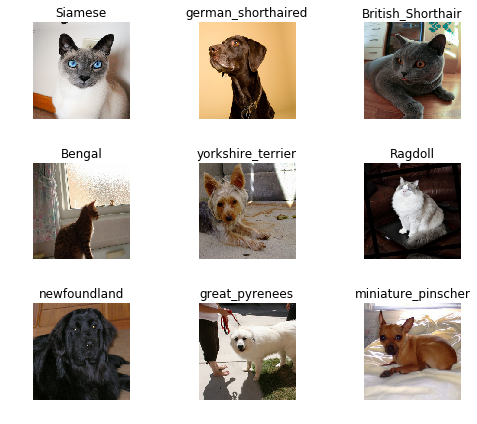

In [18]:
data.show_batch(rows=3, figsize=(7,6))